ΕΘΝΙΚΟ ΜΕΤΣΟΒΙΟ ΠΟΛΥΤΕΧΝΕΙΟ

Σχολή Ηλεκτρολόγων Μηχανικών και
Μηχανικών Υπολογιστών

Εισαγωγή στις Τηλεπικοινωνίες

Εργαστηριακή ΄Ασκηση, Ακαδ. ΄Ετος 2020-21


# Ερώτημα 1 
(def question1ab)

Α=1 am=2 fm=2kHz

* α.i)  
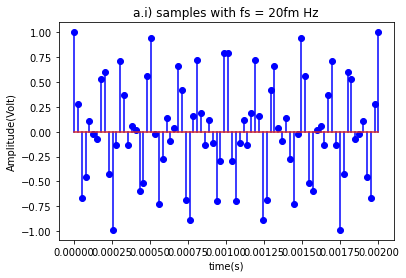

*  α.ii)

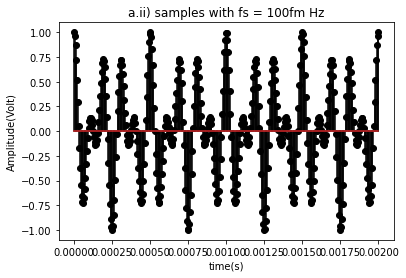

*  α.iii)

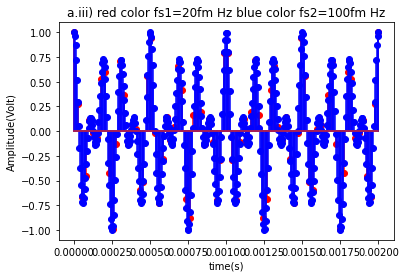
*  b) Τι παρατηρείτε αν το σήμα δειγματοληπτηθεί με fs = 5fm; Ποια είναι η ελάχιστη θεωρητική fs
ώστε να είναι δυνατή η ακριβής ανακατασκευή του σήματος;

Από θεώρημα Shannon γνωρίζουμε ότι για να είναι δυνατή η ακριβής ανακατασκευή του σήματος πρέπει ή συχνότητα δειγματολειψίας να είναι fs>2W , w:= channel bandwith.
Για την ανακατασκευή του συγκεκριμένου σήματος χρειαζόμαστε συχνότητα fs>8fm,
Επομένως η συχνότητα fs=5fm δεν είναι αρκετή για την τέλεια ανακατασκευή του σήματος (έχουμε παραμόρφωση στο τελευταίο διάγραμμα

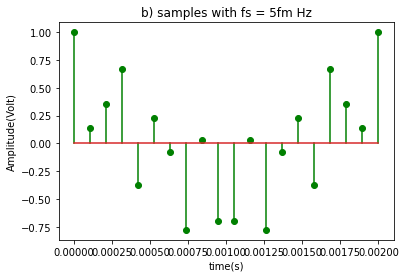









In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def question1ab(fm,am):
    #a1
    plt.figure(1)
    t0 = np.linspace(0,4/fm,20*4)  #  20*fm*4*1/fm=80
    y0 = np.cos(2*np.pi*fm*t0)*np.cos(2*np.pi*(2+am)*fm*t0)
    plt.xlabel('time(s)')
    plt.ylabel('Amplitude(Volt)')
    plt.title('a.i) samples with fs = 20fm Hz')
    plt.stem(t0,y0,'b','bo')

    #a2
    plt.figure(2)
    t1 = np.linspace(0,4/fm,400)  #  100fm*4/fm=400
    y1 = np.cos(2*np.pi*fm*t1)*np.cos(2*np.pi*(2+am)*fm*t1)  # custom signal
    plt.xlabel('time(s)')
    plt.ylabel('Amplitude(Volt)')
    plt.title('a.ii) samples with fs = 100fm Hz')
    plt.stem(t1,y1,'k','ko')

    #a3
    plt.figure(3)
    plt.stem(t0,y0,'r','ro')
    plt.stem(t1,y1,'b','bo')
    plt.xlabel('time(s)')
    plt.ylabel('Amplitude(Volt)')
    plt.title('a.iii) red color fs1=20fm Hz blue color fs2=100fm Hz')

    #b
    plt.figure(4)
    t2= np.linspace(0,4/fm,20) # fs=5fm-> 5fm*4/fm=20
    y2 = np.cos(2*np.pi*fm*t2)*np.cos(2*np.pi*(2+am)*fm*t2)
    plt.xlabel('time(s)')
    plt.ylabel('Amplitude(Volt)')
    plt.title('b) samples with fs = 5fm Hz')
    plt.stem(t2,y2,'g','go')

    plt.show()

question1ab(2000,2)


# Ερώτημα 2

def question 2a,2b,2c

fm=2kHz, am=2
*   α) Δίνουμε το δειγματοληπτούμενο σήμα ως είσοδο στον κβαντιστή ο οποίος είναι 
τύπου mid riser και συνεπώς η έξοδός του δίνεται από τους τύπους:   
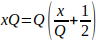,
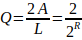, 
image.png


Έξοδος κβαντιστή xQ:

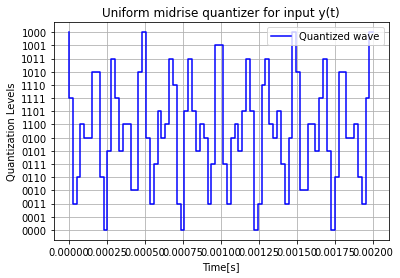

*  β) Το SNR σε dB προκύπτει από τον τύπο 

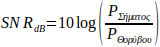

    

Για τον θεωρητικό υπολογισμό

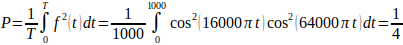

Έξοδος προγράμματος

```
Standard deviation for first 10 samples:  0.0325519830266838

Standard deviation for first 20 samples:  0.0367101817696525

SNR for the first 10 samples of the quantized signal is equal to :  23.128626308450258 dB

SNR for the first 20 samples of the quantized signal is equal to :  22.3893129499333 dB

Theoretical SNR equals 22.833012287035498 dB
```


*Συμπέρασμα*

Όσα περισσότερα δείγματα χρησιμοποιήσουμε για τον υπολογισμό των πειραματικών SNR τόσο πιο κοντά θα είναι το αποτέλεσμα στο θεωρητικό SNR.



      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def question2a(fm,am):
    A = 1
    if (fm / 1000) % 2 == 0:
        n = 4
    else:
        n = 5
    Q = 2 * A / 2 ** n + 1e-14  # n bits

    def uniform_midrise_quantizer(x, Q):

        xQ = Q * (np.floor(x / Q) + .5)  # Q output
        return xQ

    def binary_to_gray(n):

        n = int(n, 2) 
        n ^= (n >> 1)

        # bin(n) returns n's binary representation with a '0b' prefixed
        # the slice operation is to remove the prefix
        if (n == 4):  return bin(n)[2:].zfill(4)  # 4bit gray code 
        if (n == 5):  return bin(n)[2:].zfill(5)  # 5bit gray code

    if (n == 4):
        k = '{0:04b}'.format(0)
        for x in range(1, 16, 1):
            k = np.append(k, '{0:04b}'.format(x))  # save xQ binaries to k

        d = '{0:04b}'.format(0)
        for x in range(1, 16, 1):
            d = np.append(d, binary_to_gray(
                k[x]))  # covert binaries to gray and save to d

        t1 = np.linspace(0, 4/fm,4*20)  # Sampling with fs=20fm
        x = np.cos(2 * np.pi * fm * t1) * np.cos(2 * np.pi * (2 + am) * fm * t1) # Q input

        # Run quantizer with input x and save output
        xQ = uniform_midrise_quantizer(x, Q)  

        plt.yticks(np.arange(min(xQ), max(xQ) + 1/2, Q),
                   ('0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100',
                    '1100', '1101', '1111', '1110', '1010', '1011', '1001', '1000'))

        plt.step(t1, xQ, color='blue', label='Quantized wave')
        plt.axis()
        plt.xlabel('Time[s]')
        plt.ylabel('Quantization Levels')
        plt.title('Uniform midrise quantizer for input y(t)')
        plt.grid()
        plt.legend(loc='upper right')
        plt.show()

    if (n == 5):
        k = '{0:05b}'.format(0)
        for x in range(1, 32, 1):
            k = np.append(k, '{0:05b}'.format(x))  # save xQ binaries to k

        d = '{0:05b}'.format(0)
        for x in range(1, 32, 1):
            d = np.append(d, binary_to_gray(
                k[x]))  # covert binaries to gray and save to d

        t1 = np.linspace(0, 4/fm, 4*20)  # Sampling with fs=20fm
        x = np.cos(2 * np.pi * fm * t1) * np.cos(2 * np.pi * (2 + am) * fm * t1) # Q input

        # Run quantizer with input x and save output
        xQ = uniform_midrise_quantizer(x, Q)  

        plt.yticks(np.arange(min(xQ), max(xQ) + 1e-14, Q),
                   ('00000', '00001', '00011', '00010', '00110', '00111', '00101', '00100', '01100',
                    '01101', '01111', '01110', '01010', '01011', '01001', '01000', '11000', '11001',
                    '11011', '11010', '11110', '11111', '11101', '11100', '10100', '10101', '10111',
                    '10110', '10010', '10011', '10001', '10000'))

        plt.step(2 * t1, xQ, color='blue', label='Quantized wave')
        plt.axis()
        plt.xlabel('Time[s]')
        plt.ylabel('Quantization Levels')
        plt.title('Uniform midrise quantizer for input y(t)')
        plt.grid()
        plt.legend(loc='upper right')
        plt.show()


question2a(2000,2)


def question2b(fm,am):
    A = 1
    if (fm / 1000) % 2 == 0:
        n = 4
    else:
        n = 5
    Q = 2 * (A) / 2 ** n + 1e-14

    def uniform_midrise_quantizer(x, Q):
        xQ = Q * (np.floor(x / Q) + .5)  
        return xQ



    t1 = np.linspace(0,4/ fm,20*4)
    x = np.cos(2 * np.pi * fm * t1) * np.cos(2 * np.pi * (2 + am) * fm * t1)  
    xQ = uniform_midrise_quantizer(x, Q)  
    sf = xQ - x  # sfalma
    # gia to 2b_i
    std10 = np.std(sf[:10])  # 10 samples std
    print('Standard deviation for first 10 samples: ', std10)
    # gia to 2b_ii
    std20 = np.std(sf[:20])  # 20 samples std
    print('Standard deviation for first 20 samples: ', std20)
    
    # 2b_iii)
    p1 = 0
    p2 = 0
    np1 = 0
    np2 = 0
    
    # signal power
    for i in range(10):
        p1 = p1 + x[i] ** 2
        p2 = p2 + x[i] ** 2
        np1 = np1 + sf[i] ** 2
        np2 = np2 + sf[i] ** 2
    for i in range(10, 20):
        p2 = p2 + x[i] ** 2
        np2 = np2 + sf[i] ** 2

    p1 = p1 / 10
    p2 = p2 / 20
    np1 = np1 / 10
    np2 = np2 / 20

    # SNR
    SNR10 = 10 * np.log10(p1 / np1)  # SNR for the first 10 samples
    SNR20 = 10 * np.log10(p2 / np2)  # SNR for the first 20 samples
    # tiposi apotelesmatwn snr
    print("SNR for the first 10 samples of the quantized signal is equal to : ", SNR10, "dB")
    print("SNR for the first 20 samples of the quantized signal is equal to : ", SNR20, "dB")
    # ipologismos theoritikou snr
    SNR = 10 * np.log10((3/4)*2** (2 * n))
    print("Theoretical SNR equals", SNR, "dB")


question2b(2000,2)


def question2c(fm,am):
    def uniform_midrise_quantizer(x, Q):
        xQ = Q * (np.floor(x / Q) + .5) 
        return xQ

    A = fm / 1000
    if (fm / 1000) % 2 == 0:
        n = 4
    else:
        n = 5

    Q = 2 / 2 ** n + 1e-14  # n bits

    # Gray
    if (n == 5):
        grays = ['00000', '00001', '00011', '00010', '00110', '00111', '00101', '00100', '01100',
                 '01101', '01111', '01110', '01010', '01011', '01001', '01000', '11000', '11001',
                 '11011', '11010', '11110', '11111', '11101', '11100', '10100', '10101', '10111',
                 '10110', '10010', '10011', '10001', '10000']

    elif (n == 4):
        grays = ['0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100',
                 '1100', '1101', '1111', '1110', '1010', '1011', '1001', '1000']

    t1 = np.linspace(0, 4/fm, 4*20)
    x = np.cos(2 * np.pi * fm * t1) * np.cos(2 * np.pi * (2 + am) * fm * t1)
    xQ = uniform_midrise_quantizer(x, Q)

    g = []
    y = np.zeros(20)
    levels = (np.arange(min(xQ), max(xQ) + 1e-14, Q))

    for i in range(20):
        y[i] = np.argmin(np.abs(levels - xQ[i]))

    for i in range(20):
        # print(int(y[i]))
        g.append(grays[int(y[i])])

    out = np.zeros(40 * n)
    bitstream = "".join(g)  
    prev = -1
    for i in range(20 * n):
        if bitstream[i:(i + 1)] == '1' and prev == -1:
            out[2 * i] = A
            prev = 1
        elif bitstream[i:(i + 1)] == '1' and prev == 1:
            out[2 * i] = -A
            prev = -1
        else:
            out[2 * i] = 0

    time = np.zeros(40 * n)
    for i in range(40 * n):
        time[i] = 0.0005 * i  
    plt.figure(6)
    plt.ylabel("Amplitude[V]")
    plt.xlabel("t[s]")
    plt.title("Bitstream for one period of the output of the quantizer")
    plt.step(time, out, label='Volts that represent the bits')
    plt.yticks([-A, 0, A])
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()


question2c(2000,2)



# Ερώτημα 3
Α=11V
*  a) B-PAM διαμόρφωση

    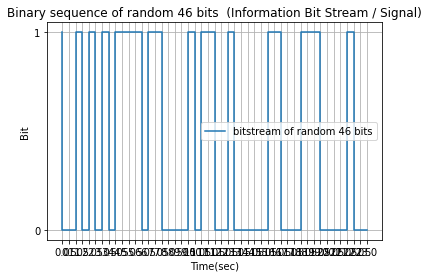

    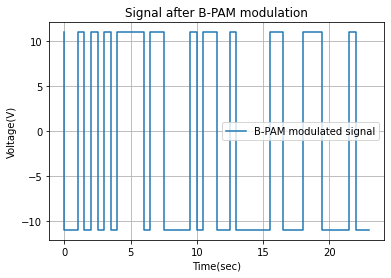
*  b) 

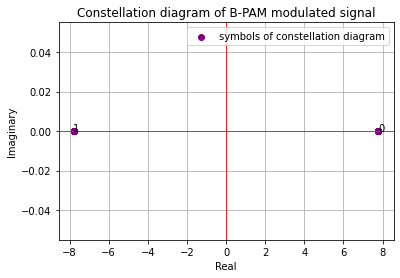
    
*  γ) 	Ο θόρυβος AGWN, ως μιγαδικη στοχαστική διαικασία Ζ=Χ + iY,  X, Y ανεξάρτητες, τυχαίες διαδικασίες που ακολουθούν την κανονική κατανομή με,





	
	
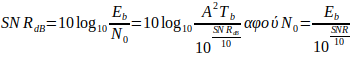


*  Τιμές SNR πειράματος 5dB ,15dB


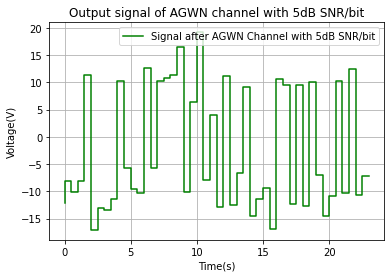

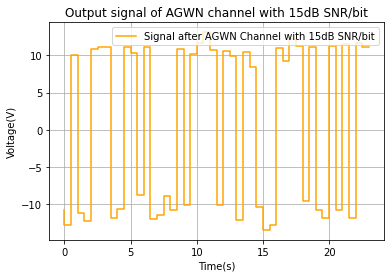
*  d) Παρατηρείται ότι για χαμηλότερη τιμή SNR, τα λαμβανόμενα σήματα είναι πιο απομακρυσμένα από τον αστερισμό της ΒΡΑΜ.

  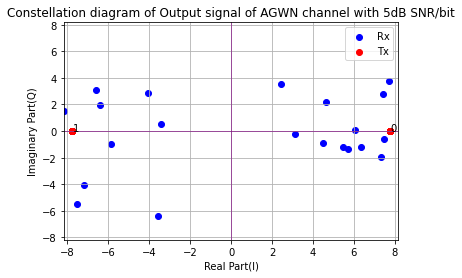


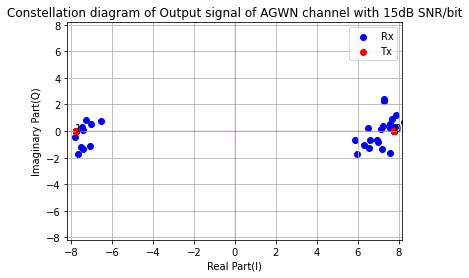

*  e) Η BER εξετάζει δύο ανεξάρτητα μεταξύ τους ενδεχόμενα 
(0σταλθηκε, 1αποφασιστηκε) και (1σταλθηκε, 0αποφασιστηκε), και ο θόρυβος που προστίθεται ακολουθεί κανονική κατανομή, επομένως τα bits είναι ισοπίθανα και προκύπτει
    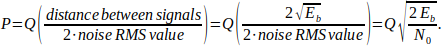

    
*  Ως προς τον πειραματικό υπολογισμό της BER, παράξαμε  τυχαία bits, προσθέσαμε AWGN θόρυβο και μετρήσαμε τα εσφαλμένα bits για τιμές  SNR από 0-15 dB με βήμα 1 dB.

    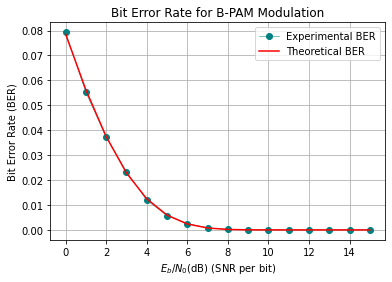

    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erfc

def question3a(A):
    bits = np.random.randint(2, size=46)
    Tb = 0.5
    a = bits[45]
    bits = np.append(bits, a)
    time = np.arange(0, 23.5, Tb)
    plt.figure(7)
    plt.step(time, bits, label='bitstream of random 46 bits')
    plt.xticks(time)
    plt.yticks([0, 1])
    plt.xlabel('Time(sec)')
    plt.ylabel('Bit')
    plt.title('Binary sequence of random 46 bits  (Information Bit Stream / Signal)')
    plt.grid()
    plt.legend(loc='center right')

    # rand = np.random.normal(0, 1, size=36)
    pol = lambda x: -A if x == 0 else A
    modul = [pol(x) for x in bits]
    plt.xticks(time)
    plt.figure(8)
    plt.step(time, modul, label='B-PAM modulated signal')
    plt.xlabel('Time(sec)')
    plt.ylabel('Voltage(V)')
    plt.title('Signal after B-PAM modulation')
    plt.grid()
    plt.legend(loc='center right')
    plt.show()


question3a(11)

def question3b(A):
    bits = np.random.randint(2, size=46)
    Tb = 0.5
    pol = lambda x : -A*math.sqrt(Tb) if x == 0 else A*math.sqrt(Tb)
    modul = [pol(x) for x in bits]
    plt.figure(9)
    plt.scatter(np.real(modul),np.imag(modul),color='purple',label='symbols of constellation diagram')
    plt.annotate('1', xy=(-A*math.sqrt(Tb), 0), xytext=(-A*math.sqrt(Tb) - 0.04, 0))
    plt.annotate('0', xy=(A*math.sqrt(Tb), 0), xytext=(A*math.sqrt(Tb) + 0.02, 0))
    plt.axhline(0, lw=0.8, color='red')
    plt.axvline(0, lw=0.8, color='red')
    plt.title('Constellation diagram of B-PAM modulated signal')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

question3b(11)


def question3c(A):
    bits = np.random.randint(2, size=46)
    Tb = 0.5
    a = bits[45]
    bits = np.append(bits, a)
    time = np.arange(0, 23.5, Tb)
    pol = lambda x: -A if x == 0 else A
    modul = [pol(x) for x in bits]
    plt.figure(10)
    plt.xticks(time)
    plt.step(time, modul, label='B-PAM modulated signal')
    plt.xlabel('Time(sec)')
    plt.ylabel('Voltage(V)')
    plt.title('Signal after B-PAM modulation')
    plt.legend(loc='upper right')
    plt.grid()

    def AWGN(A, Tb, SNR, N=47, sinusoidal=False):
        N0 = A ** 2 * Tb / 10 ** (SNR / 10)
        if sinusoidal: N0 /= 2
        noise = np.random.normal(0, np.sqrt(N0 / 2), size=N) + 1j * (np.random.normal(0, np.sqrt(N0 / 2), size=N))
        return noise

    noise1 = AWGN(A, Tb, 5)
    noise2 = AWGN(A, Tb, 15)
    out1 = modul + noise1
    out2 = modul + noise2

    plt.figure(11)
    plt.step(time, np.real(out1), color='green', label='Signal after AGWN Channel with 5dB SNR/bit')
    plt.grid()
    plt.xlabel('Time(s)')
    plt.ylabel('Voltage(V)')
    plt.title('Output signal of AGWN channel with 5dB SNR/bit')
    plt.legend(loc='upper right')

    plt.figure(12)
    plt.step(time, np.real(out2), color='orange', label='Signal after AGWN Channel with 15dB SNR/bit')
    plt.grid()
    plt.xlabel('Time(s)')
    plt.ylabel('Voltage(V)')
    plt.title('Output signal of AGWN channel with 15dB SNR/bit')
    plt.legend(loc='upper right')
    plt.show()


question3c(11)


def question3di(A):
    bits = np.random.randint(2, size=46)
    Tb = 0.5
    a = bits[45]
    bits = np.append(bits, a)
    time = np.arange(0, 23.5, Tb)
    pol = lambda x: -A * math.sqrt(Tb) if x == 0 else A * math.sqrt(Tb)
    modul = [pol(x) for x in bits]

    def AWGN(A, Tb, SNR, N=47, sinusoidal=False):
        N0 = A ** 2 * Tb / 10 ** (SNR / 10)
        if sinusoidal: N0 /= 2
        noise = np.random.normal(0, np.sqrt(N0 / 2), size=N) + 1j * (np.random.normal(0, np.sqrt(N0 / 2), size=N))
        return noise

    noise1 = AWGN(A, Tb, 5)
    out1 = modul + noise1

    plt.figure(13)
    plt.scatter(np.real(out1), np.imag(out1), color='blue', label='Rx')
    plt.scatter(np.real(modul), np.imag(modul), color='red', label='Tx')
    plt.annotate('1', xy=(-A * math.sqrt(Tb), 0), xytext=(-A * math.sqrt(Tb) + 0.04, 0))
    plt.annotate('0', xy=(A * math.sqrt(Tb), 0), xytext=(A * math.sqrt(Tb) + 0.02, 0))
    plt.xlim([-A * math.sqrt(Tb) - 0.4, A * math.sqrt(Tb) + 0.4])
    plt.ylim([-A * math.sqrt(Tb) - 0.4, A * math.sqrt(Tb) + 0.4])
    plt.xlabel('Real Part(I)')
    plt.ylabel('Imaginary Part(Q)')
    plt.title('Constellation diagram of Output signal of AGWN channel with 5dB SNR/bit')
    plt.axhline(0, lw=0.6, color='purple')
    plt.axvline(0, lw=0.6, color='purple')
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()


question3di(11)


def question3dii(A):
    bits = np.random.randint(2, size=46)
    Tb = 0.5
    a = bits[45]
    bits = np.append(bits, a)
    time = np.arange(0, 23.5, Tb)
    pol = lambda x: -A * math.sqrt(Tb) if x == 0 else A * math.sqrt(Tb)
    modul = [pol(x) for x in bits]

    def AWGN(A, Tb, SNR, N=47, sinusoidal=False):
        N0 = A ** 2 * Tb / 10 ** (SNR / 10)
        if sinusoidal: N0 /= 2
        noise = np.random.normal(0, np.sqrt(N0 / 2), size=N) + 1j * (np.random.normal(0, np.sqrt(N0 / 2), size=N))
        return noise


    noise2 = AWGN(A, Tb, 15)
    out2 = modul + noise2
    plt.figure(14)
    plt.scatter(np.real(out2), np.imag(out2), color='blue', label='Rx')
    plt.scatter(np.real(modul), np.imag(modul), color='red', label='Tx')
    plt.annotate('1', xy=(-A * math.sqrt(Tb), 0), xytext=(-A * math.sqrt(Tb) - 0.04, 0))
    plt.annotate('0', xy=(A * math.sqrt(Tb), 0), xytext=(A * math.sqrt(Tb) + 0.02, 0))
    plt.xlim([-A * math.sqrt(Tb) - 0.4, A * math.sqrt(Tb) + 0.4])
    plt.ylim([-A * math.sqrt(Tb) - 0.4, A * math.sqrt(Tb) + 0.4])
    plt.xlabel('Real Part(I)')
    plt.ylabel('Imaginary Part(Q)')
    plt.title('Constellation diagram of Output signal of AGWN channel with 15dB SNR/bit')
    plt.axhline(0, lw=0.2, color='purple')
    plt.axvline(0, lw=0.2, color='purple')
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()


question3dii(11)


def question3e(A):
    Tb = 0.5
    pol = lambda x: -A * math.sqrt(Tb) if x == 0 else A * math.sqrt(Tb)

    def AWGN(A, Tb, SNR, N, sinusoidal=False):
        N0 = A ** 2 * Tb / 10 ** (SNR / 10)
        if sinusoidal: N0 /= 2
        noise = np.random.normal(0, np.sqrt(N0 / 2), size=N) + 1j * (np.random.normal(0, np.sqrt(N0 / 2), size=N))
        return noise

    def BER(nos=10**5,log_log=False):
        # experimental
        bits = np.random.randint(2, size=nos)
        time = np.arange(0, nos, 1)
        modul = [pol(x) for x in bits]
        cut = lambda x: 1 if (x.real > 0) else 0
        BER = np.zeros(16)
        SNR = np.arange(0, 16, 1)
        for i in SNR:
            noise = AWGN(A, Tb, i, nos)
            out = noise+modul
            r = np.array([cut(p) for p in out])
            errors = np.sum(bits ^ r)
            BER[i] = errors * 1.0 / nos

        plt.figure(15)
        plt.plot(SNR, 10 * np.log10(BER) if log_log else BER, lw=0.5, marker='o', color='teal',
                 label='Experimental BER')

        # theoritical
        BERth = 0.5*erfc(np.sqrt(10**(SNR/10)))
        plt.plot(SNR, 10 * np.log10(BERth) if log_log else BERth, color='red', label='Theoretical BER')

        plt.xlabel('$E_b / N_0$(dB) (SNR per bit)')
        plt.ylabel('Bit Error Rate (BER)')
        plt.title('Bit Error Rate for B-PAM Modulation')
        plt.legend(loc='upper right')
        plt.grid()
        plt.show()

    BER()

question3e(11)



# Ερώτημα 4

*  α) Η διαμόρφωση QPSK με κωδικοποίηση (π/4) Gray προσθέτει π/4 rad στη φάση των διαμορφωμένων κυματομορφών.

    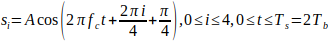


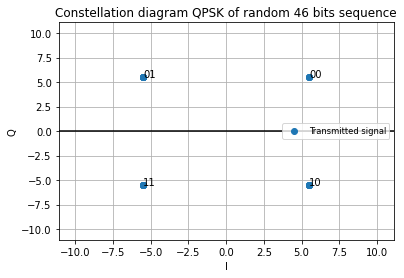

κάθε τεταρτημόριο περιέχει ένα σύμβολο

*  b) 5 dB και 15 dB αντίστοιχα

    
  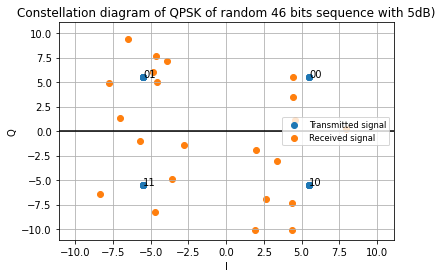


  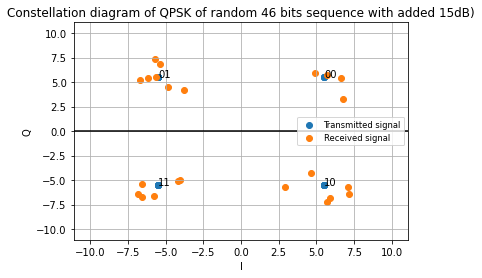

  Tα λαμβανόμενα σήματα είναι πιο μακριά από τον αστερισμό της (π/4) QPSK.

*  γ)  Η BER θεωρητικά αντίστοιχα  με το 3ε προκύπτει: 

    
  image.png



   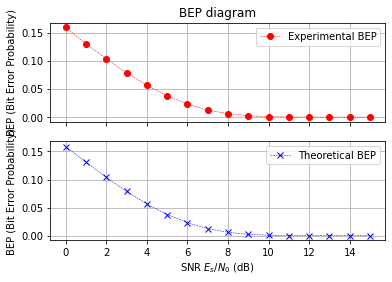

*  Παρατηρείται μια μικρή απόκλιση μεταξύ των τιμών της QPSK και της ΒΡΑΜ. Αυτό εξηγείται από το διαφορετικό τρόπο που προκύπτει το SNR σε κάθε διαμόρφωση

*  BPAM: 
  
  image.png

* QSPK: 

  image.png

  image.png
    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special
import scipy.io.wavfile
import math
from sympy.combinatorics.graycode import GrayCode
import binascii


def question4(fm,A):


    def PSK_sequence(a,N,M):
        """Generate symbol sequence for M-PSK from bitstream"""
        symbol_sequence=[]
        k=int(math.log(M,2))
        for j in range(N//k):
            symbol=str(a[k*j])
            for i in range(1,k):
                symbol+=str(a[k*j+i])
            symbol_sequence.append(symbol)
        return symbol_sequence


    Tb=0.5
    N1=10**5
    Es=(A**2)*Tb
    SNR=np.arange(0,16,1)
    Eb=Es/2
    N=46 #number of samples
    a=np.random.randint(2,size=N) #46bits random sequence
    qpsk=PSK_sequence(a,N,4)

    Es = (A ** 2) * Tb
    Eb = Es / 2

    def AWGN(Eb,ratio,N):
        N0=Eb/(10**(ratio/10))
        return np.random.normal(0,np.sqrt(N0/2),size=N)+1j*np.random.normal(0,np.sqrt(N0/2),size=N)


    def pi4_QPSK_constellation_diagram(sequence, E):
        theta = math.pi / 4
        IQ_stream = []
        for x in sequence:
            if x == "00":
                IQ_stream.append(math.sqrt(E) * np.exp(1j * theta))
            elif x == "01":
                IQ_stream.append(math.sqrt(E) * np.exp(1j * 3 * theta))
            elif x == "11":
                IQ_stream.append(math.sqrt(E) * np.exp(1j * 5 * theta))
            elif x == "10":
                IQ_stream.append(math.sqrt(E) * np.exp(1j * 7 * theta))
        return IQ_stream


    def pi4_qpsk_annotate(E):
        plt.annotate("00", (math.sqrt(2 * E) / 2, math.sqrt(2 * E) / 2))
        plt.annotate("01", ((-1) * math.sqrt(2 * E) / 2, math.sqrt(2 * E) / 2))
        plt.annotate("11", ((-1) * math.sqrt(2 * E) / 2, (-1) * math.sqrt(2 * E) / 2))
        plt.annotate("10", (math.sqrt(2 * E) / 2, (-1) * math.sqrt(2 * E) / 2))


    qpsk_constellation = pi4_QPSK_constellation_diagram(qpsk, Es)
    plt.figure()
    plt.grid()
    plt.scatter(np.real(qpsk_constellation), np.imag(qpsk_constellation), label="Transmitted signal")

    plt.axhline(color="black")
    plt.legend(loc=7, fontsize="small")
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.ylim((-1) * math.sqrt(Es) - math.sqrt(A), math.sqrt(Es) + math.sqrt(A))
    plt.xlim((-1) * math.sqrt(Es) - math.sqrt(A), math.sqrt(Es) + math.sqrt(A))
    plt.title("Constellation diagram QPSK of random 46 bits sequence")
    pi4_qpsk_annotate(Es)

    """part 4b"""

    plt.figure()
    plt.grid()
    r3 = qpsk_constellation + AWGN(Es, 5, N // 2)
    plt.scatter(np.real(qpsk_constellation), np.imag(qpsk_constellation), label="Transmitted signal")
    pi4_qpsk_annotate(Es)
    plt.scatter(np.real(r3), np.imag(r3), label="Received signal")

    plt.axhline(color="black")
    plt.legend(loc=7, fontsize="small")
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.ylim((-1) * math.sqrt(Es) - math.sqrt(A), math.sqrt(Es) + math.sqrt(A))
    plt.xlim((-1) * math.sqrt(Es) - math.sqrt(A), math.sqrt(Es) + math.sqrt(A))
    plt.title("Constellation diagram of QPSK of random 46 bits sequence with 5dB)")

    plt.figure()
    plt.grid()
    r4 = qpsk_constellation + AWGN(Es, 15, N // 2)
    plt.scatter(np.real(qpsk_constellation), np.imag(qpsk_constellation), label="Transmitted signal")
    pi4_qpsk_annotate(Es)
    plt.scatter(np.real(r4), np.imag(r4), label="Received signal")

    plt.axhline(color="black")
    plt.legend(loc=7, fontsize="small")
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.ylim((-1) * math.sqrt(Es) - math.sqrt(A), math.sqrt(Es) + math.sqrt(A))
    plt.xlim((-1) * math.sqrt(Es) - math.sqrt(A), math.sqrt(Es) + math.sqrt(A))
    plt.title("Constellation diagram of QPSK of random 46 bits sequence with added 15dB)")

    """part 4c"""


    def received_pi4_qpsk(seq):
        """Demodulation of pi4-QPSK signal"""
        received = []
        for j in range(len(seq)):
            if np.real(seq[j]) >= 0 and np.imag(seq[j]) >= 0:
                received.append("00")
            elif np.real(seq[j]) < 0 and np.imag(seq[j]) > 0:
                received.append("01")
            elif np.real(seq[j]) <= 0 and np.imag(seq[j]) < 0:
                received.append("11")
            elif np.real(seq[j]) > 0 and np.imag(seq[j]) < 0:
                received.append("10")
        return received


    def compare_qpsk(seq, received):
        """A function that compares RX signal with TX signal for pi4-QPSK and calculates the number and rate of Bit Error"""
        count = 0
        for j in range(len(seq)):
            if seq[j][0] != received[j][0]:
                count += 1
            if seq[j][1] != received[j][1]:
                count += 1
        return count, count / (2 * len(seq))


    c = np.random.randint(2, size=N1)
    qpsk1 = PSK_sequence(c, N1, 4)
    constellation_qpsk1 = pi4_QPSK_constellation_diagram(qpsk1, Es)
    BEP2 = []
    BEP2_th = []

    for ratio in range(16):
        r5 = constellation_qpsk1 + AWGN(Es, ratio, N1 // 2)
        received = received_pi4_qpsk(r5)
        er, BEP_ = compare_qpsk(qpsk1, received)
        BEP2.append(BEP_)
        BEP2_th.append(0.5 * special.erfc(math.sqrt(0.5 * 10 ** (ratio / 10))))
        print(
            "Experimental BEP for pi-4 QPSK with SNR={}dB: {}. {} errors at {} samples".format(ratio, BEP2[ratio], er, N1))
        print("Theoretical BEP for pi-4 QPSK with SNR={}dB: {}".format(ratio, BEP2_th[ratio]))

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
    ax1.set_title("BEP diagram")
    ax1.plot(SNR, BEP2, "ro--", linewidth=0.5, label="Experimental BEP")
    ax1.set_ylabel("BEP (Bit Error Probability)")
    ax1.grid()
    ax1.legend()
    ax2.plot(SNR, BEP2_th, "bx--", linewidth=0.5, label="Theoretical BEP")
    plt.xlabel("SNR $E_s/N_0$ (dB)")
    plt.ylabel("BEP (Bit Error Probability)")
    plt.grid()
    plt.legend()
    plt.show()

question4(2000,11)





# Ερώτημα 5 

** Για να τρέξετε αυτό το ερώτημα χρειάζεται να ανεβάσετε το αρχέιο στο file system tou notebook, καθώς μένουν ενεργά μόνο για το τρέχον session και να δώσετε το κατάλληλο path **

*  a)

    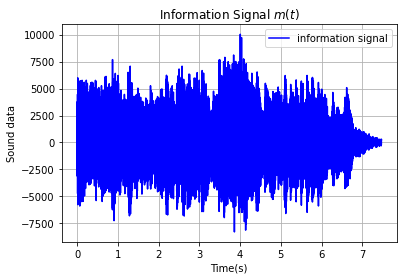

*  b) Mid riser quantizer , 

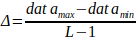

*  Quantizer output : 

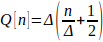


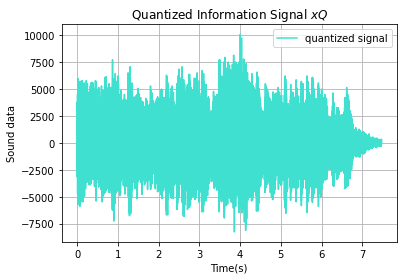

*  c, d, e, f)  Θα διαμορφώσουμε το σήμα κατά QPSK στην πλευρά του πομπού προκειμένου να το στείλουμε στο δέκτη μέσω του AWGN καναλιού, και θα το απεικονίσουμε με κωδικοποίηση Gray.

*  Μιγαδικό επίπεδο

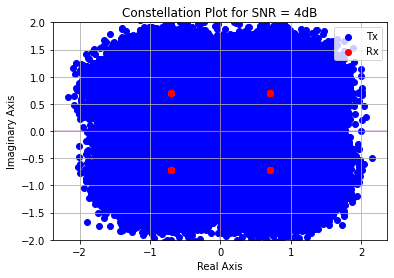

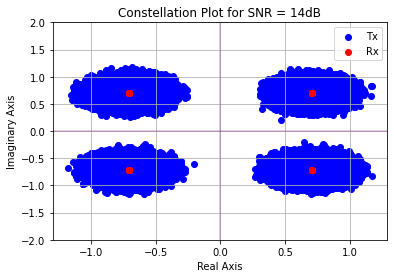

```
SNR = 4dB: Theoretical BER = 0.01250081804073755, Experimental BER = 0.0
SNR = 14dB: Theoretical BER = 6.810189128780772e-13, Experimental BER = 0.0

```

*  g) Ομαδοποιήσαμε το σήμα μας σε οκτάδες και απεικονίσαμε τις τιμές στις κανονικοποιημένες στάθμες κβάντισης στο διάστημα 0-255

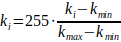

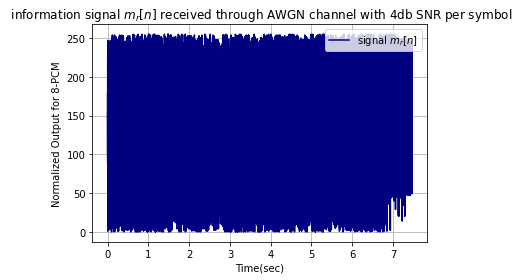


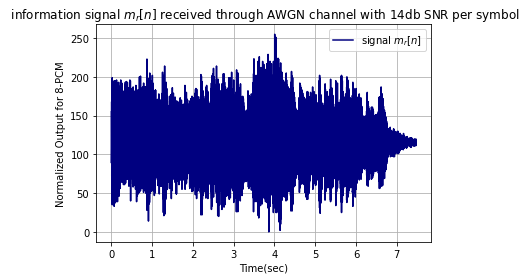

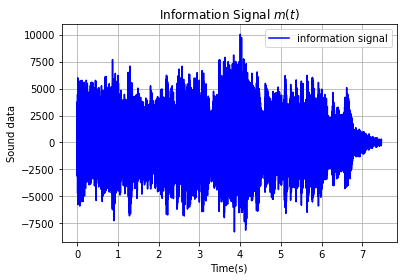

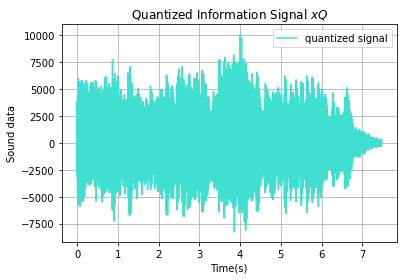

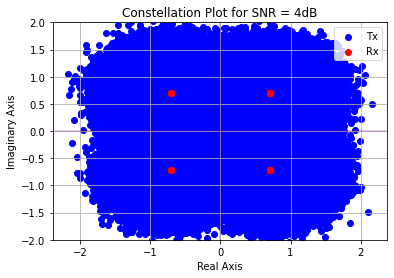

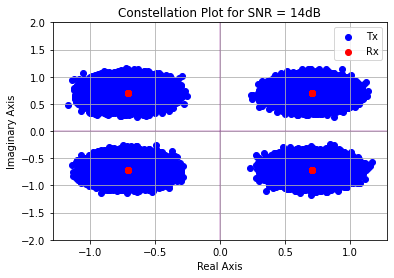

SNR = 4dB: Theoretical BER = 0.01250081804073755, Experimental BER = 0.0
SNR = 14dB: Theoretical BER = 6.810189128780772e-13, Experimental BER = 0.0


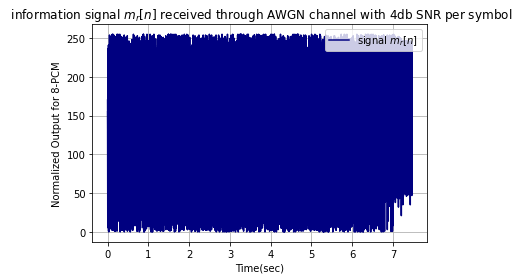

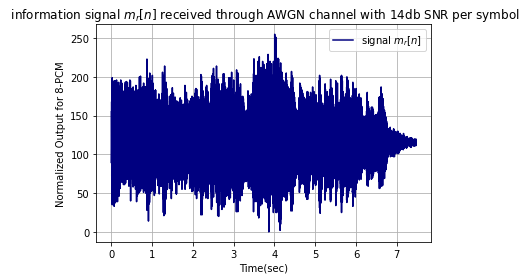

In [19]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.special import erfc 

def question5a(B):
    file = '/soundfile1_lab2.wav'
    fs, sig = scipy.io.wavfile.read(file)
    length = len(sig)
    Ts = 1 / fs
    n = np.linspace(0, length, length)
    time = n * Ts

    plt.figure()
    plt.plot(time, sig, color='blue', label='information signal')
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('Time(s)')
    plt.ylabel('Sound data')
    plt.title('Information Signal $m(t)$')
    plt.show()

question5a(11)


def question5b(B):
    file='/soundfile1_lab2.wav'
    fs, sig = scipy.io.wavfile.read(file)
    length = len(sig)
    Ts = 1 / fs
    n = np.linspace(0, length, length)
    time = n * Ts

    Q = 8
    # Mid-riser Quantizer input-output function
    x = abs(max(sig) - min(sig)) / 2 ** (Q) + 1e-14
    quant = lambda t: x * (np.floor(t / x) + 0.5)
    xQ = [quant(x) for x in sig]

    # Quantized signal plot
    plt.figure()
    plt.step(time, xQ, label='quantized signal', color='turquoise')
    plt.legend(loc='upper right')
    plt.xlabel('Time(s)')
    plt.ylabel('Sound data')
    plt.title('Quantized Information Signal $xQ$')
    plt.grid()
    plt.show()


question5b(11)


def question5cdef(B):
    file='/soundfile1_lab2.wav'
    fs, sig = scipy.io.wavfile.read(file)
    length = len(sig)
    Ts = 1 / fs
    n = np.linspace(0, length, length)
    time = n * Ts

    Q = 8
    # Mid-riser Quantizer input-output function
    x = abs(max(sig) - min(sig)) / 2 ** (Q) + 1e-14
    quant = lambda t: x * (np.floor(t / x) + 0.5)
    xQ = [quant(x) for x in sig]

    # Range split and values
    keys = np.arange(min(xQ), max(xQ) + 1e-14, abs(max(xQ) - min(xQ)) / (2 ** Q))
    values = ['{0:08b}'.format(a) for a in range(2 ** Q)]

    # takes a quantized signal as input and returns the equivalent bitstream based on a set of keys and value
    def bit_stream(yq, keys, values):
        bitstream = []
        for i in yq:
            idx = (np.abs(keys - i)).argmin()
            bitstream.append(values[idx])
        return bitstream

    # extract bitstream
    bs_ = bit_stream(xQ, keys, values)
    bs = []

    # map groups to sequence
    for x in bs_:
        for y in x:
            bs.append(y)

    def QPSK(b, B, Ts=1, SNR=np.arange(0, 10, 1), plot_constellation=False):
        Es = B ** 2 * Ts
        SNRl = 10 ** (SNR / 10)  # linear snr scale

        # Gray mapping
        phasors = {
            '00': 1 + 1j,
            '01': -1 + 1j,
            '11': -1 - 1j,
            '10': 1 - 1j,
        }

        # inverse mapping
        inv_phasors = dict(zip(phasors.values(), phasors.keys()))

        s = []  # modulated signal
        results = {}

        # QPSK modulation
        for i in range(0, len(b), 2):
            x = b[i] + b[i + 1]
            s.append(phasors[x])

        s = np.sqrt(Es / 2) * np.array(s)

        # real and imaginary components
        si = np.real(s)
        sq = np.imag(s)

        N = len(s)

        # BER for real and imaginary components
        BER_I = np.zeros(len(SNR))
        BER_Q = np.zeros(len(SNR))

        for i, n in enumerate(SNR):
            X = np.sqrt(Es / 2) * np.random.normal(0, 1, size=N)
            Y = np.sqrt(Es / 2) * np.random.normal(0, 1, size=N)
            noise = (1 / np.sqrt(2 * SNRl[i])) * (X + 1j * Y)  # AGWN stochastic process
            out = s + noise # Rx signal through AWGN channel
            outi = np.sign(np.real(out))  # received inphase
            outq = np.sign(np.imag(out))  # received quadraphase
            # In-phase BER refers to BPSK alone
            BER_I[i] = (N - np.sum(si == outi)) / N
            # Quadraphase BER refers to BPSK alone
            BER_Q[i] = (N - np.sum(sq == outq)) / N
            outd = outi + 1j * outq  # demodulated signal phasors
            results[n] = []

            for x in outd:
                results[n].append(inv_phasors[x])

            results[n] = ''.join(results[n])

            # constellation plot
            if plot_constellation:
                plt.figure()
                plt.xlabel('Real Axis')
                plt.ylabel('Imaginary Axis')
                plt.title('Constellation Plot for SNR = {}dB'.format(n))
                plt.scatter(np.real(out), np.imag(out), color='b', label='Tx')
                plt.scatter(si, sq, color='r', label='Rx');
                plt.ylim([- B - 1, B + 1])
                plt.ylim([- B - 1, B + 1])
                plt.axhline(0, lw=0.4, color='purple')
                plt.axvline(0, lw=0.4, color='purple')
                plt.legend(loc='upper right')
                plt.grid()
                plt.show()

        # theoretical and experimental SNR
        BER_th = 0.5 * erfc(np.sqrt(10 ** (SNR / 10)))
        BER = 0.5 * (BER_I - BER_Q)

        for i, n in enumerate(SNR):
            print('SNR = {}dB: Theoretical BER = {}, Experimental BER = {}'.format(n, BER_th[i], BER[i]))

        return results

    # desired SNR array
    SNR = np.array([4, 14])
    results_ = QPSK(b=bs, B=1, Ts=1, SNR=SNR, plot_constellation=True)


question5cdef(11)


def question5z(B):
    file='/soundfile1_lab2.wav'
    fs, sig = scipy.io.wavfile.read(file)
    length = len(sig)
    Ts = 1 / fs
    n = np.linspace(0, length, length)
    time = n * Ts

    Q = 8
    # Mid-riser Quantizer input-output function
    x = abs(max(sig) - min(sig)) / 2 ** (Q) + 1e-14
    quant = lambda t: x * (np.floor(t / x) + 0.5)
    xQ = [quant(x) for x in sig]

    # Range split and values
    keys = np.arange(min(xQ), max(xQ) + 1e-14, abs(max(xQ) - min(xQ)) / (2 ** Q))
    values = ['{0:08b}'.format(a) for a in range(2 ** Q)]

    # takes a quantized signal as input and returns the equivalent bitstream based on a set of keys and value
    def bit_stream(yq, keys, values):
        bitstream = []
        for i in yq:
            idx = (np.abs(keys - i)).argmin()
            bitstream.append(values[idx])
        return bitstream

    # extract bitstream
    bs_ = bit_stream(xQ, keys, values)
    bs = []

    # map groups to sequence
    for x in bs_:
        for y in x:
            bs.append(y)

    def QPSK(b, B, Ts=1, SNR=np.arange(0, 10, 1), plot_constellation=False):
        Es = B ** 2 * Ts
        SNRl = 10 ** (SNR / 10)  # linear snr scale

        # Gray mapping
        phasors = {
            '00': 1 + 1j,
            '01': -1 + 1j,
            '11': -1 - 1j,
            '10': 1 - 1j,
        }

        # inverse mapping
        inv_phasors = dict(zip(phasors.values(), phasors.keys()))

        s = []  # modulated signal
        results = {}

        # QPSK modulation
        for i in range(0, len(b), 2):
            x = b[i] + b[i + 1]
            s.append(phasors[x])

        s = np.sqrt(Es / 2) * np.array(s)

        # real and imaginary components
        si = np.real(s)
        sq = np.imag(s)

        N = len(s)

        # BER for real and imaginary components
        BER_I = np.zeros(len(SNR))
        BER_Q = np.zeros(len(SNR))

        for i, n in enumerate(SNR):
            X = np.sqrt(Es / 2) * np.random.normal(0, 1, size=N)
            Y = np.sqrt(Es / 2) * np.random.normal(0, 1, size=N)
            noise = (1 / np.sqrt(2 * SNRl[i])) * (X + 1j * Y)  # AGWN stochastic process
            out = s + noise;  # Rx signal through AWGN channel
            outi = np.sign(np.real(out));  # received inphase
            outq = np.sign(np.imag(out));  # received quadraphase
            # In-phase BER refers to BPSK alone
            BER_I[i] = (N - np.sum(si == outi)) / N;
            # Quadraphase BER refers to BPSK alone
            BER_Q[i] = (N - np.sum(sq == outq)) / N;
            outd = outi + 1j * outq  # demodulated signal phasors
            results[n] = []

            for x in outd:
                results[n].append(inv_phasors[x])

            results[n] = ''.join(results[n])

        return results

    # desired SNR array
    SNR = np.array([4, 14])
    results_ = QPSK(b=bs, B=1, Ts=1, SNR=SNR, plot_constellation=True)

    # Break to octets
    results = {}
    for snr in SNR:
        results[snr] = []
        for i in range(0, len(results_[snr]), Q):
            results[snr].append(results_[snr][i:i + Q])

    # define inverse mapping and normalize keys
    keys = (keys - np.min(keys)) / (np.max(keys) - np.min(keys)) * 255
    keys = keys.astype('uint8')  # cast to uint8

    # inverse mapping to 0-255 quantization levels
    inv_mapping = dict(zip(values, keys))

    # received signal result normalized in [0, 255] range
    mr = {}

    # extract final received signals through the use of the inverse mapping
    for snr in SNR:
        mr[snr] = np.zeros(len(results[snr]), dtype='uint8')
        for i, x in enumerate(results[snr]):
            mr[snr][i] = inv_mapping[x]
        plt.figure()
        plt.plot(time, mr[snr], label='signal $m_r[n]$', color='navy')
        plt.xlabel('Time(sec)')
        plt.ylabel('Normalized Output for 8-PCM')
        plt.title(' information signal $m_r[n]$ received through AWGN channel with {}db SNR per symbol'.format(snr))
        plt.legend(loc='upper right')
        plt.grid()
        scipy.io.wavfile.write('{}_result_{}dB.wav'.format(file, snr), fs, mr[snr])
    plt.show()


question5z(11)
